# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames
import seaborn as sns
from matplotlib import pyplot as plt


# Pretty display for notebooks
%matplotlib inline

df = pd.read_csv("census.csv")

df.head()



,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Exercise 1  Exploration 

In [2]:
# The total number of records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [3]:
# The number of individuals making more than $50000 annually
# The number of individuals making at most $50000 annually
df['income'].value_counts()

income
<=50K    34014
>50K     11208
Name: count, dtype: int64

In [4]:
# The percentage of individuals making at more than $50000 annually
df['income'].value_counts(normalize=True)

income
<=50K    0.752156
>50K     0.247844
Name: proportion, dtype: float64

### Exercise 2 Preprocessing 

In [5]:
df.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
# Visualize skewed continuous features of original data
for num_feature in ["education-num", "capital-gain", "capital-loss", "hours-per-week"]:
    print(f"Skewness of {num_feature} of the original data is {df[num_feature].skew()}")
    

Skewness of education-num of the original data is -0.3106209464770189
Skewness of capital-gain of the original data is 11.789002180291192
Skewness of capital-loss of the original data is 4.516304152981587
Skewness of hours-per-week of the original data is 0.34054514378520867


In [7]:
# Outliers Treatment

In [8]:
# remove the values above 3 standard deviation and below -3 standard deviation
from scipy import stats
df2 = df.copy()
df2['ZR'] = stats.zscore(df2["capital-gain"])
df2.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,ZR
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,0.142888
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,-0.146733
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,-0.146733
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,-0.146733
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,-0.146733


In [9]:
df2 = df2[(df2['ZR']>-3) & (df2['ZR']<3)].drop(["ZR"], axis=1)
df2.shape

(44912, 14)

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Data Transformation
numeral = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
Z_numeral = ["Zage", "Zeducation-num", "Zcapital-gain", "Zcapital-loss", "Zhours-per-week"]
df2[numeral].head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13.0,2174.0,0.0,40.0
1,50,13.0,0.0,0.0,13.0
2,38,9.0,0.0,0.0,40.0
3,53,7.0,0.0,0.0,40.0
4,28,13.0,0.0,0.0,40.0


In [11]:
df2[Z_numeral] = StandardScaler().fit_transform(df2[numeral])
df2.drop(numeral, axis=1, inplace=True)
df2.head()

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income,Zage,Zeducation-num,Zcapital-gain,Zcapital-loss,Zhours-per-week
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,0.038017,1.141440,0.710802,-0.21957,-0.073345
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,0.870247,1.141440,-0.239881,-0.21957,-2.327626
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,-0.037640,-0.432184,-0.239881,-0.21957,-0.073345
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,1.097219,-1.218996,-0.239881,-0.21957,-0.073345
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,-0.794213,1.141440,-0.239881,-0.21957,-0.073345


In [12]:
non_numeral = list(set(df2.columns) - set(Z_numeral) - {'income'})
non_numeral

['education_level',
 'marital-status',
 'sex',
 'occupation',
 'relationship',
 'workclass',
 'race',
 'native-country']

In [13]:
# Perform one-hot encoding on the data
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(df2[non_numeral])
encoded_data = encoder.transform(df2[non_numeral])

# 将编码结果转化为一个新的DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(), index=df2.index)
df2.drop(non_numeral, axis=1, inplace=True)
df2 = pd.concat([df2, encoded_df], axis=1)
df2.head()

d:\Softwares\anaconda3\envs\CS329-ML\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,income,Zage,Zeducation-num,Zcapital-gain,Zcapital-loss,Zhours-per-week,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,<=50K,0.038017,1.141440,0.710802,-0.21957,-0.073345,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,<=50K,0.870247,1.141440,-0.239881,-0.21957,-2.327626,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,<=50K,-0.037640,-0.432184,-0.239881,-0.21957,-0.073345,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,<=50K,1.097219,-1.218996,-0.239881,-0.21957,-0.073345,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,<=50K,-0.794213,1.141440,-0.239881,-0.21957,-0.073345,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.preprocessing import LabelEncoder
df2['income'] = LabelEncoder().fit_transform(df2["income"])
df2.head()

,income,Zage,Zeducation-num,Zcapital-gain,Zcapital-loss,Zhours-per-week,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,0.038017,1.141440,0.710802,-0.21957,-0.073345,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0.870247,1.141440,-0.239881,-0.21957,-2.327626,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,-0.037640,-0.432184,-0.239881,-0.21957,-0.073345,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,1.097219,-1.218996,-0.239881,-0.21957,-0.073345,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,-0.794213,1.141440,-0.239881,-0.21957,-0.073345,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exercise 3 Shuffle and Split Data

In [15]:
# Split the 'feature' and 'income' data into training and testing sets
from sklearn.model_selection import train_test_split
X = df2.drop('income', axis=1)
y = df2['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is:", y_test.shape)

The shape of X_train is: (35929, 103)
The shape of X_test is: (8983, 103)

The shape of y_train is: (35929,)
The shape of y_test is: (8983,)


### Exercise 4 Evaluating Model
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression

You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

In [16]:
# Evaluating Model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

def evaluate(model):
    y_pred = model.fit(X_train, y_train).predict_proba(X_test)
    threshold = 0.5
    y_pred_class = y_pred[:, 1] > threshold
    return y_pred, y_pred_class

GaussianNB accuracy: 0.6485583880663476
DecisionTreeClassifier accuracy: 0.8517199153957475
RandomForestClassifier accuracy: 0.8477123455415785
LogisticRegression accuracy: 0.8435934543025715


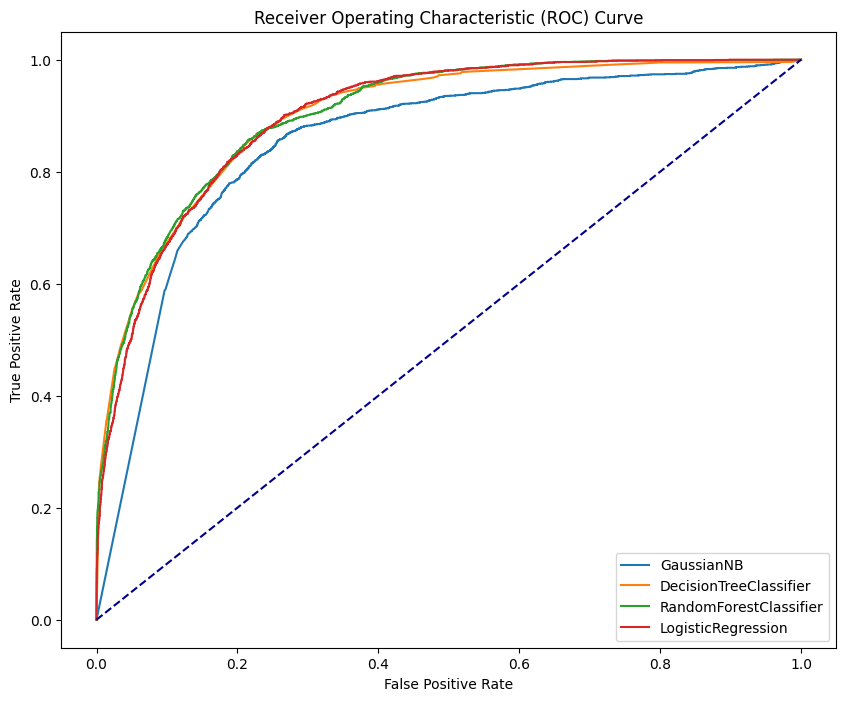

In [17]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Decision Trees
from sklearn.tree import DecisionTreeClassifier

# Ensemble Methods
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

models = {
    GaussianNB: {},
    DecisionTreeClassifier: {"max_depth": 10},
    RandomForestClassifier: {"max_depth": 8},
    LogisticRegression: {"max_iter": 1000},
}

plt.figure(figsize=(10, 8), dpi=100)
for model, args in models.items():
    model_name = model.__name__
    y_pred, y_pred_class = evaluate(model(**args))
    print(f'{model_name} accuracy: {metrics.accuracy_score(y_test, y_pred_class)}')

    fper, tper, thresholds = metrics.roc_curve(y_test, y_pred[:, 1])
    plt.plot(fper, tper, label=model_name)

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


### Exercise 4 Questions
What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

In [18]:
# What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000
y_boring = np.ones_like(y_test)
print(f'Boring accuracy: {metrics.accuracy_score(y_test, y_boring)}')

Boring accuracy: 0.247912724034287


## Question:
### Q1:

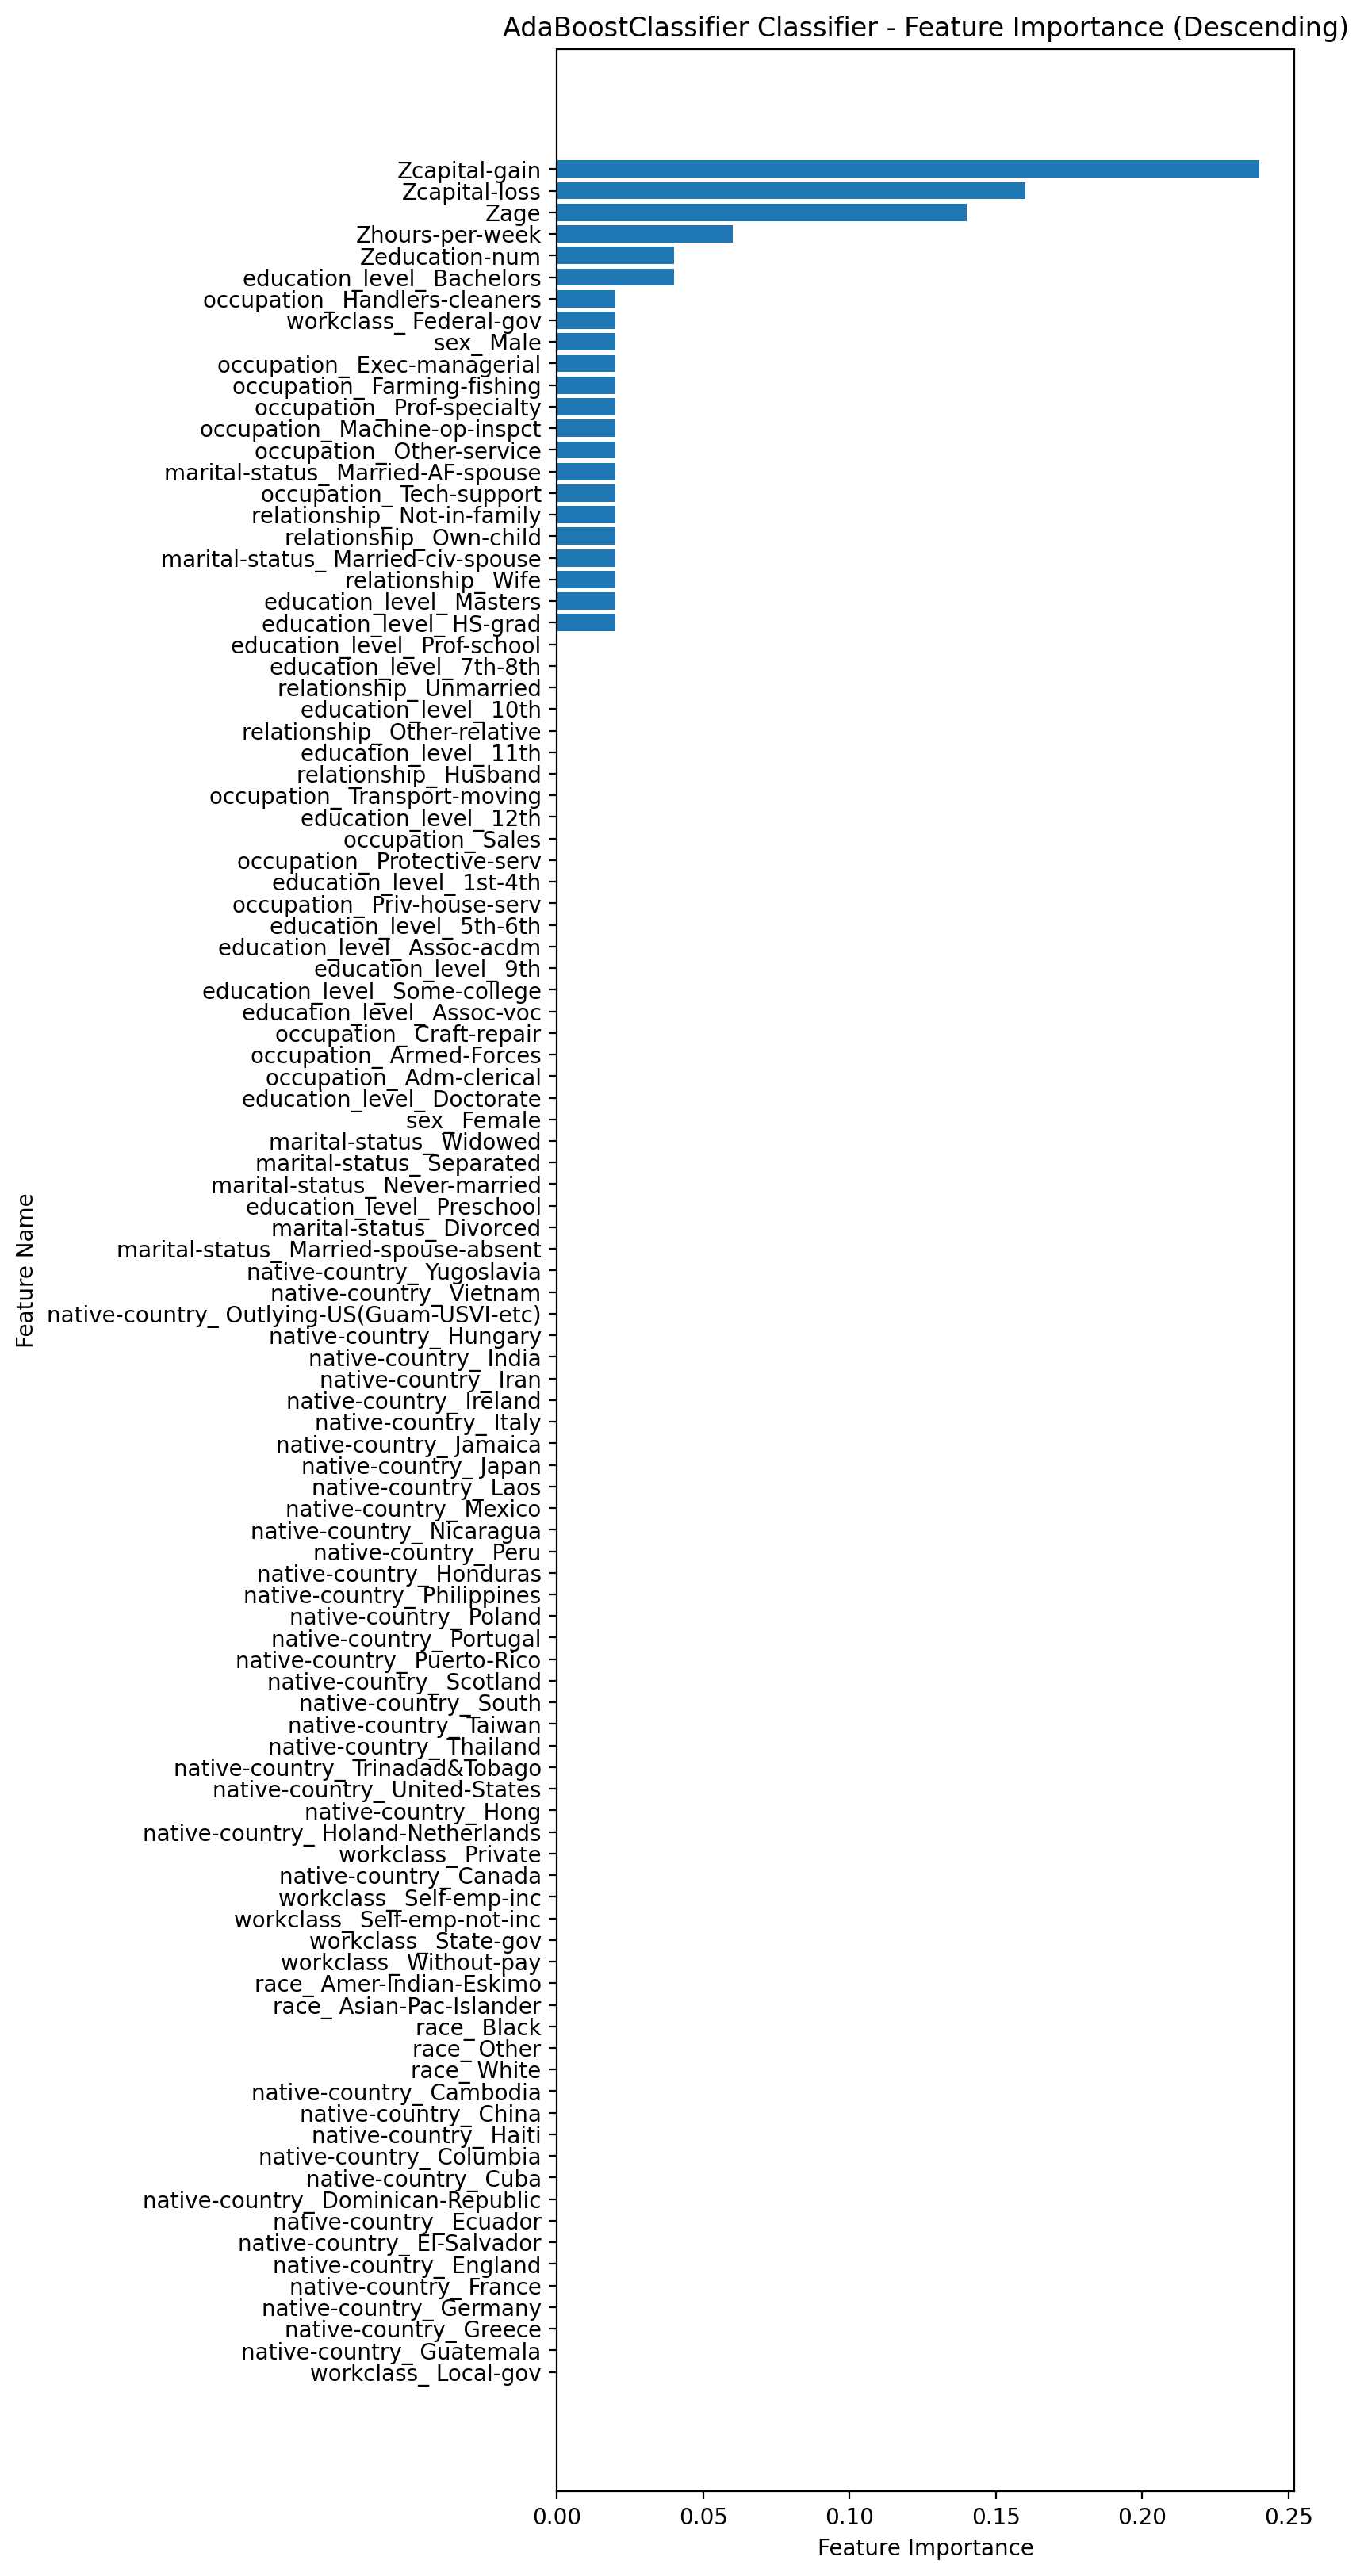

In [19]:
# 训练AdaBoostClassifier模型
rfc = AdaBoostClassifier(random_state=42).fit(X_train, y_train)

# 获取特征重要性
feature_importance = rfc.feature_importances_

# 获取特征名称
feature_names = X_train.columns  # 假设 X_train 是一个 Pandas DataFrame

# 获取特征重要性降序排列的索引
sorted_indices = np.argsort(feature_importance)[::1]

# 根据排序后的索引重新排列特征重要性和特征名称
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# 创建柱状图
plt.figure(figsize=(6, 20), dpi=200)
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, tick_label=sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('AdaBoostClassifier Classifier - Feature Importance (Descending)')

plt.show()


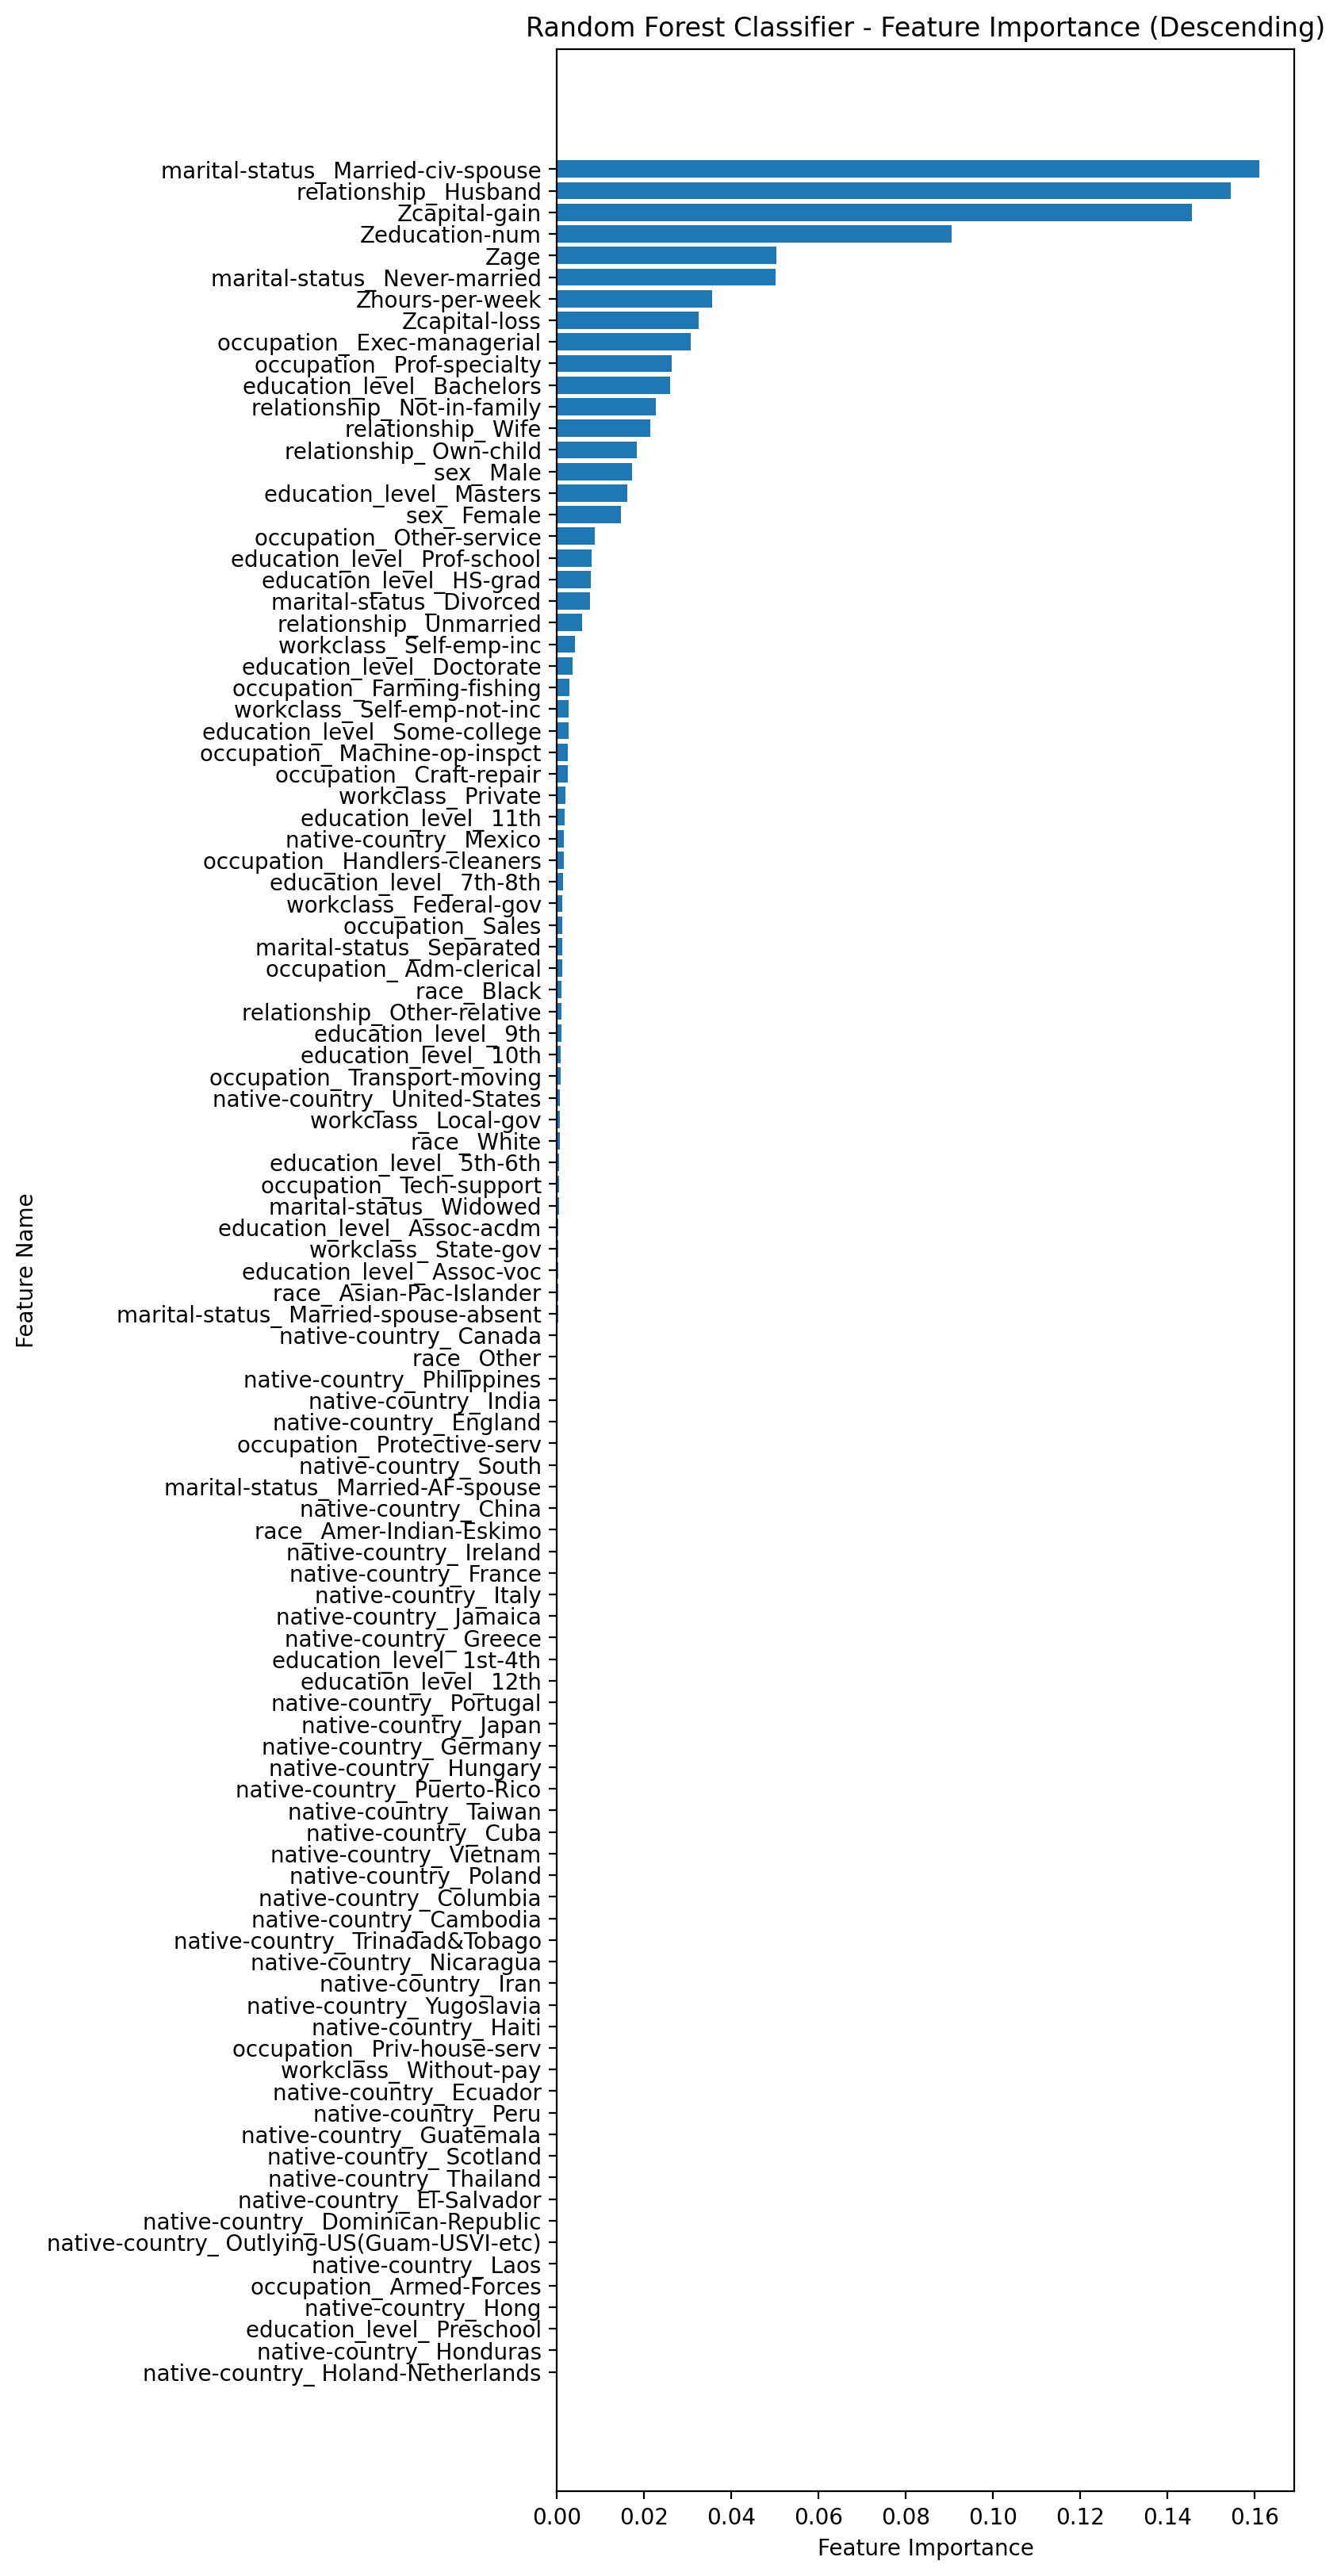

In [20]:
# 训练随机森林模型
rfc = RandomForestClassifier(max_depth=8, random_state=42).fit(X_train, y_train)

# 获取特征重要性
feature_importance = rfc.feature_importances_

# 获取特征名称
feature_names = X_train.columns  # 假设 X_train 是一个 Pandas DataFrame

# 获取特征重要性降序排列的索引
sorted_indices = np.argsort(feature_importance)[::1]

# 根据排序后的索引重新排列特征重要性和特征名称
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# 创建柱状图
plt.figure(figsize=(6, 20), dpi=200)
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, tick_label=sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Random Forest Classifier - Feature Importance (Descending)')

plt.show()


(2) 一个实际应用案例是信用评分。在金融行业，机器学习模型可以应用于信用评分，帮助银行和金融机构确定借款人的信用风险。模型可以分析借款人的历史信用记录、财务状况、还款能力等特征，并预测借款人是否会按时还款。这有助于银行更好地管理风险，做出更明智的信贷决策。

(3) 模型的优势包括：

能够自动学习特征的重要性，识别对预测目标有最大影响的特征。
可以用于分类和回归任务，适用于各种应用场景。
具有很好的泛化能力，可以处理大量数据和高维特征。
可以通过集成多个模型来提高性能。
这些模型在以下情况下表现良好：

当特征与目标之间存在明显的相关性时，模型可以很好地捕捉这些关系。
当数据集包含大量样本和特征时，模型可以有效处理高维数据。
当需要自动选择特征或进行特征工程时，这些模型可以提供特征重要性指导。
(4) 模型的弱点包括：

训练时间可能较长，尤其是在大型数据集上。
模型的参数需要调优，以获得最佳性能。
可能容易过拟合，特别是在数据噪声较大的情况下。
对于一些问题，模型可能需要更多的数据来获得好的性能。
这些模型表现不佳的情况包括：

当数据集非常小，可能容易过拟合。
当特征工程不正确或特征与目标之间的关系不明显时，模型的性能可能不佳。
当需要快速预测，而模型需要较长的训练时间时，不适用。
(5) 这些模型是很好的候选者，因为它们能够自动学习特征的重要性，对于预测个体的收入是否超过 $50,000，这些特征的权重可能是非常有用的。通过评估特征重要性，可以帮助确定哪些特征对于模型性能至关重要，有助于特征选择和模型调优。此外，这些模型通常在分类任务中表现良好，可以处理大规模数据集和高维特征。
